<a href="https://colab.research.google.com/github/luuloi/GWAS_Introduction_2023/blob/main/03_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Descriptive Statistics**

In [6]:
# Import data
data <- read.csv("https://raw.githubusercontent.com/luuloi/GWAS_Introduction_2023/main/data/StudentsPerformance.csv")
head(data)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75
6,female,group B,associate's degree,standard,none,71,83,78


In [3]:
## Examine the structure of the data
str(data)

'data.frame':	1000 obs. of  8 variables:
 $ gender                     : chr  "female" "female" "female" "male" ...
 $ race.ethnicity             : chr  "group B" "group C" "group B" "group A" ...
 $ parental.level.of.education: chr  "bachelor's degree" "some college" "master's degree" "associate's degree" ...
 $ lunch                      : chr  "standard" "standard" "standard" "free/reduced" ...
 $ test.preparation.course    : chr  "none" "completed" "none" "none" ...
 $ math.score                 : int  72 69 90 47 76 71 88 40 64 38 ...
 $ reading.score              : int  72 90 95 57 78 83 95 43 64 60 ...
 $ writing.score              : int  74 88 93 44 75 78 92 39 67 50 ...


In [4]:
## Check the number of columns and rows
dim(data)

[1] 1000    8

In [5]:
## Check for NA values
table(is.na(data))


FALSE 
 8000 

In [7]:
## Remove rows with NA values, if any exist
data <- data[rowSums(is.na(data)) == 0, ]

## Remove columns with NA values, if any exist (This can be potentially dangerous, I commented it out. Uncomment only if necessary.)
# data <- data[, colSums(is.na(data)) == 0]

In [9]:
## Standard deviation and variance
sd(data$math.score) # standard deviation
var(data$math.score) # variance

[1] 15.16308

[1] 229.919

In [11]:
## Summary the data frame
summary(data)

    gender          race.ethnicity     parental.level.of.education
 Length:1000        Length:1000        Length:1000                
 Class :character   Class :character   Class :character           
 Mode  :character   Mode  :character   Mode  :character           
                                                                  
                                                                  
                                                                  
    lunch           test.preparation.course   math.score     reading.score   
 Length:1000        Length:1000             Min.   :  0.00   Min.   : 17.00  
 Class :character   Class :character        1st Qu.: 57.00   1st Qu.: 59.00  
 Mode  :character   Mode  :character        Median : 66.00   Median : 70.00  
                                            Mean   : 66.09   Mean   : 69.17  
                                            3rd Qu.: 77.00   3rd Qu.: 79.00  
                                            Max.   :100.00   Ma

In [13]:
# Create a data frame with the count of genders
data_new <- data.frame(table(data$gender))
colnames(data_new) <- c("gender", "lunch") # Rename the columns
head(data_new)

,gender,lunch
,<fct>,<int>
1,female,518
2,male,482


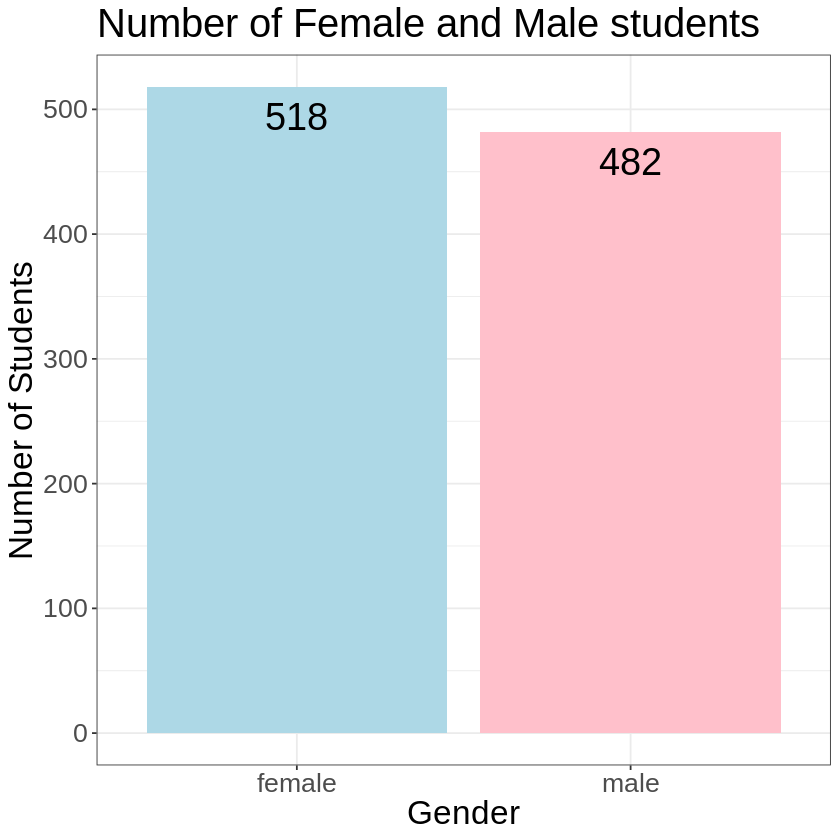

In [16]:
library(ggplot2)
## Barplot with multiple variables
ggplot(data_new, aes(x = gender, y = lunch, fill = gender)) +
    theme_bw() +
    geom_bar(stat = "identity") +
    geom_text(aes(label = lunch), vjust = 1.6, color = "black", size = 8) +
    theme(text = element_text(size = 20)) +
    theme(legend.position = "none") +
    labs(x = "Gender", y = "Number of Students", title = "Number of Female and Male students") +
    scale_fill_manual(values = c("lightblue", "pink"))

In [17]:
## Barplot with grouped data
data_new_2 <- data.frame(table(data$gender, data$lunch))
colnames(data_new_2) <- c("gender", "lunch", "freq")
head(data_new_2)

,gender,lunch,freq
,<fct>,<fct>,<int>
1,female,free/reduced,189
2,male,free/reduced,166
3,female,standard,329
4,male,standard,316


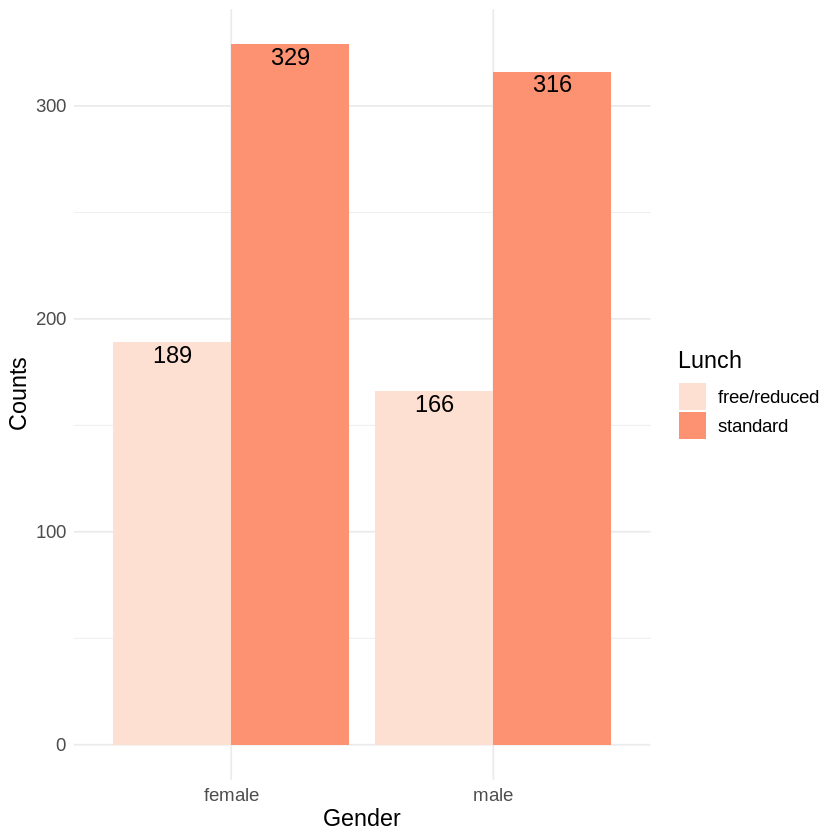

In [22]:
### Create grouped barplots
ggplot(data_new_2, aes(x = gender, y = freq, fill = lunch)) +
    geom_bar(stat = "identity", position = position_dodge()) +
    geom_text(aes(label = freq),
        vjust = 1.2,
        color = "black",
        position = position_dodge(0.9),
        size = 5
    ) +
    theme_minimal() +
    theme(text = element_text(size = 14)) +
    labs(fill = "Lunch", y = "Counts", x = "Gender") +
    scale_fill_brewer(palette = "Reds")

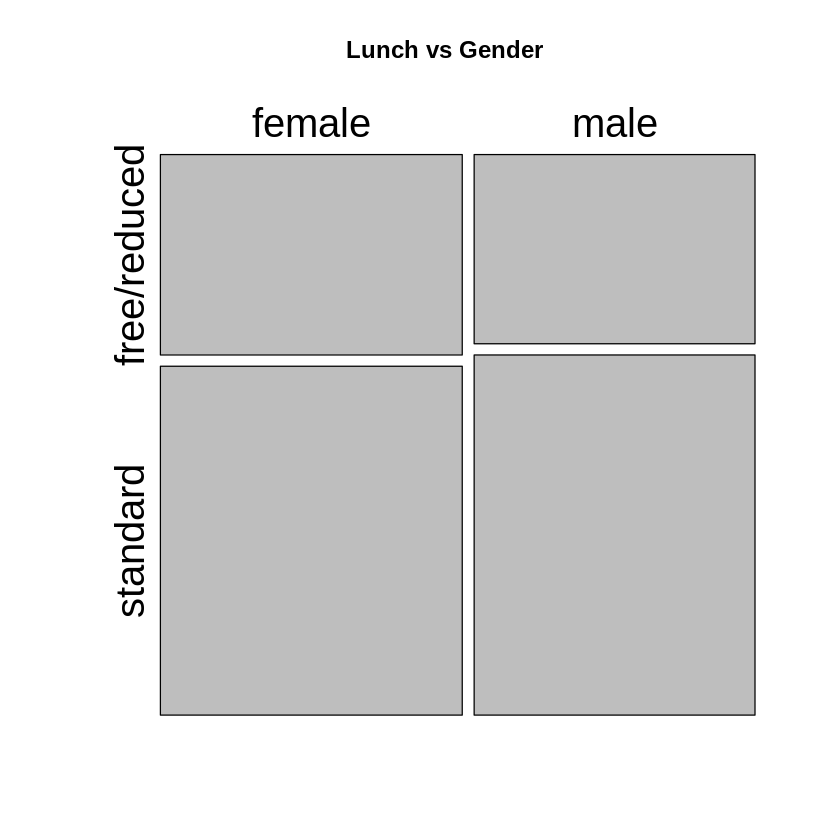

In [20]:
## Mosaicplot
mosaicplot(table(data$gender, data$lunch), cex = 2, main="Lunch vs Gender")

# **2. Contingency Table Analysis**

In [24]:
## Contingent 2x2 table
(tb1 <- table(data$lunch, data$gender))

              
               female male
  free/reduced    189  166
  standard        329  316

In [27]:
# Chi-square test
X <- chisq.test(tb1)
X


	Pearson's Chi-squared test with Yates' continuity correction

data:  tb1
X-squared = 0.37174, df = 1, p-value = 0.5421


**From the above result, we can see that p-value is less than the significance level (0.05). Therefore, we can reject the null hypothesis and conclude that the two variables (gender & lunch) are not independent.**

Note that: Chi-squared test should not be used when one of the expected counts is lower than 5

In [30]:
# Fisher's Exact Test
(F <- fisher.test(tb1))


	Fisher's Exact Test for Count Data

data:  tb1
p-value = 0.509
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.8366388 1.4297884
sample estimates:
odds ratio 
  1.093467 


From the above result, we can see that p-value is less than the significance level (0.05). Therefore, we can reject the null hypothesis and conclude that the two variables (gender & lunch) are not independent.

In [31]:
## Contingent 2x2 table
(tb2 <- table(data$test.preparation.course, data$gender))

           
            female male
  completed    184  174
  none         334  308

In [33]:
(X <- chisq.test(tb2))


	Pearson's Chi-squared test with Yates' continuity correction

data:  tb2
X-squared = 0.015529, df = 1, p-value = 0.9008


From the above result, we can see that p-value is less than the significance level (0.05). Therefore, we can reject the null hypothesis and conclude that the two variables (gender & test preparation) are not independent.

In [34]:
# Class mate data
data1 <- read.csv("https://raw.githubusercontent.com/luuloi/GWAS_Introduction_2023/main/data/Class_mates.csv")
head(data1)

,No.,Name,Age,Height,Weight,No_favorite_song,No_favorite_sport,Love_cooking,Gender,Pass_Maths3
,<int>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<int>
1,1,Loi,41,173,86.5,4,1,2,male,1
2,2,Du,21,180,65.0,20,1,2,male,1
3,3,Duy,25,177,64.0,100,2,1,male,1
4,4,Huy,25,168,65.0,1,1,2,male,0
5,5,Thien,27,165,54.0,2,2,2,male,1
6,6,Vy,31,153,44.0,3,3,1,female,0


In [35]:
(tb3 <- table(data1[c("Gender", "Pass_Maths3")]) )

        Pass_Maths3
Gender   0 1
  female 8 5
  male   2 8

In [36]:
# Fisher's Exact Test
(F <- fisher.test(tb3))


	Fisher's Exact Test for Count Data

data:  tb3
p-value = 0.0903
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  0.7342333 79.1194126
sample estimates:
odds ratio 
   5.85855 


From the above result, we can see that p-value is less than the significance level (0.05). Therefore, we can reject the null hypothesis and conclude that the two variables (gender & test preparation) are not independent.

In [37]:
(tb4 <- table(data1[c("Gender", "Love_cooking")]) )

        Love_cooking
Gender   0 1 2
  female 4 6 3
  male   0 6 4

In [38]:
# Fisher's Exact Test
(F <- fisher.test(tb4))


	Fisher's Exact Test for Count Data

data:  tb4
p-value = 0.2097
alternative hypothesis: two.sided


From the above result, we can see that p-value is less than the significance level (0.05). Therefore, we can reject the null hypothesis and conclude that the two variables (gender & test preparation) are not independent.

# **3. P-value and Manhattan plot**

In [40]:
# Ensure pacman is installed and loaded
if (!require("pacman")) install.packages("pacman")
library("pacman")

# Install qqman package
pacman::p_load("qqman")

# loading library
library(qqman)

Loading required package: pacman

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pacman’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘calibrate’



qqman installed



In [41]:
# Check the structure of the dataset
str(gwasResults)

'data.frame':	16470 obs. of  4 variables:
 $ SNP: chr  "rs1" "rs2" "rs3" "rs4" ...
 $ CHR: int  1 1 1 1 1 1 1 1 1 1 ...
 $ BP : int  1 2 3 4 5 6 7 8 9 10 ...
 $ P  : num  0.915 0.937 0.286 0.83 0.642 ...


In [42]:
# Display the first 6 rows of data
head(gwasResults)

,SNP,CHR,BP,P
,<chr>,<int>,<int>,<dbl>
1,rs1,1,1,0.9148060
2,rs2,1,2,0.9370754
3,rs3,1,3,0.2861395
4,rs4,1,4,0.8304476
5,rs5,1,5,0.6417455
6,rs6,1,6,0.5190959


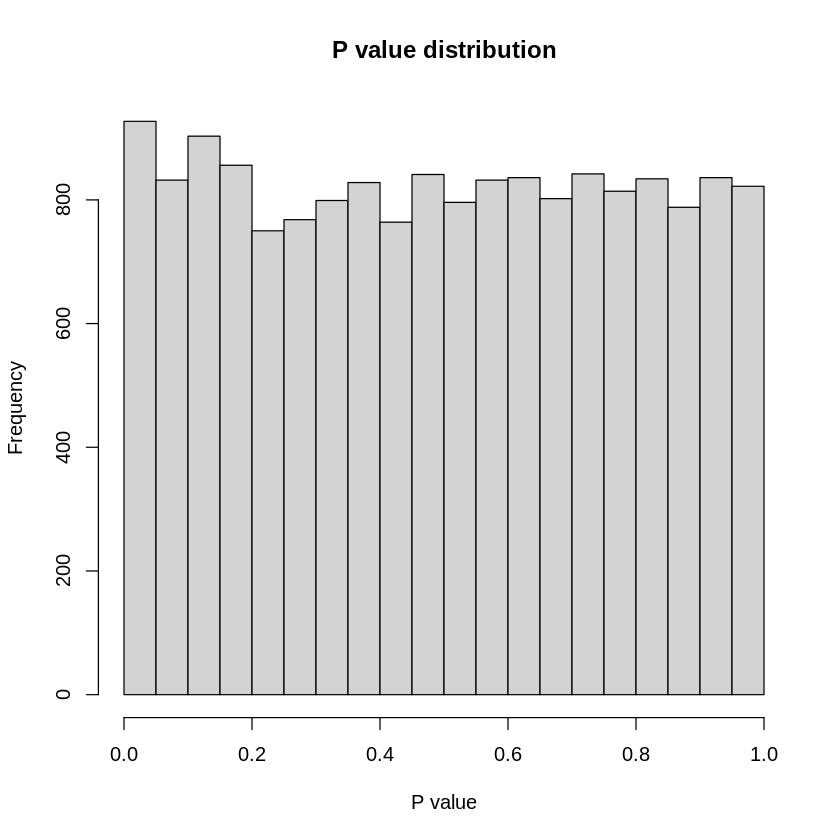

In [48]:
# column P is P-value
hist(gwasResults$P, xlab="P value", main="P value distribution")

In [ ]:
# Count SNPs on each chromosome
print(as.data.frame(table(gwasResults$CHR)))

   Var1 Freq
1     1 1500
2     2 1191
3     3 1040
4     4  945
5     5  877
6     6  825
7     7  784
8     8  750
9     9  721
10   10  696
11   11  674
12   12  655
13   13  638
14   14  622
15   15  608
16   16  595
17   17  583
18   18  572
19   19  562
20   20  553
21   21  544
22   22  535


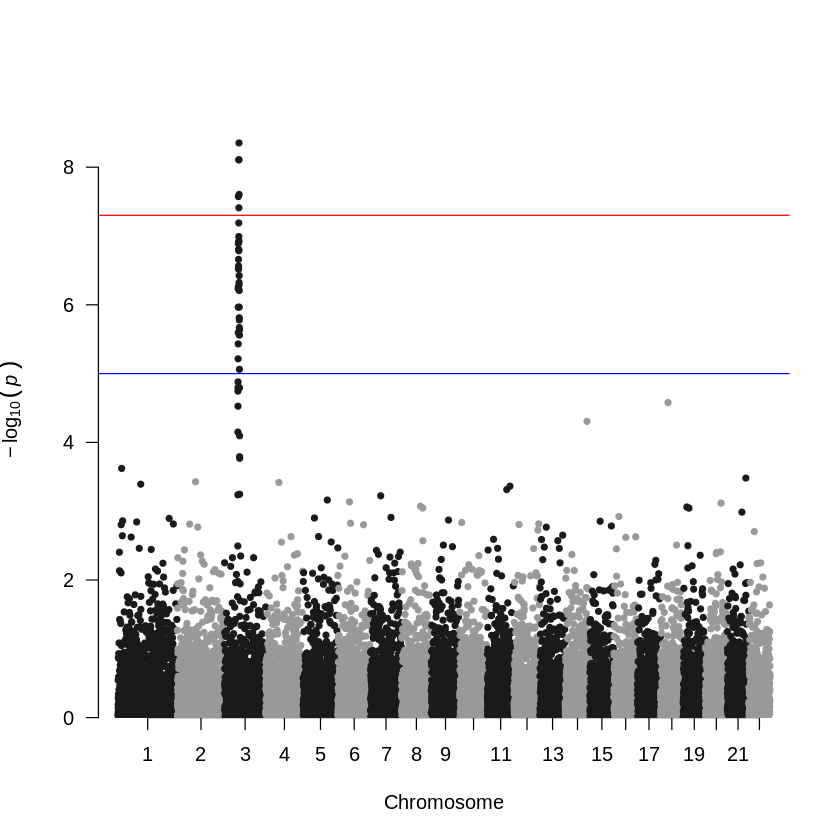

In [ ]:
# Create Manhattan plots using default arguments and then with specified columns
manhattan(gwasResults)

manhattan(gwasResults, chr = "CHR", bp = "BP", snp = "SNP", p = "P")

Manhattan plots represent the P values of the entire GWAS on a genomic scale. The P values are represented in genomic order by chromosome and position on the chromosome (x-axis). The value on the y-axis represents the −log10 of the P value (equivalent to the number of zeros after the decimal point plus one).

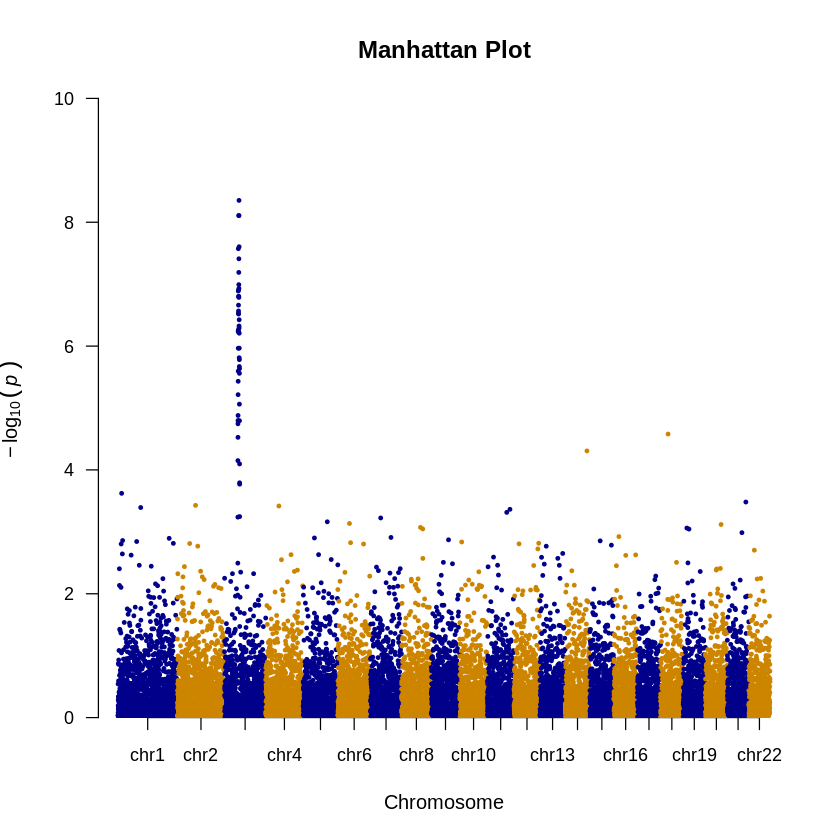

In [ ]:
# Customize the Manhattan plot's appearance
manhattan(gwasResults,
          main = "Manhattan Plot", ylim = c(0, 10), cex = 0.6, cex.axis = 0.9,
          col = c("blue4", "orange3"), suggestiveline = FALSE, genomewideline = FALSE,
          chrlabs = paste0("chr", c(1:22)))

In [ ]:
# Highlighting specific SNPs of interest
str(snpsOfInterest)

 chr [1:100] "rs3001" "rs3002" "rs3003" "rs3004" "rs3005" "rs3006" "rs3007" ...


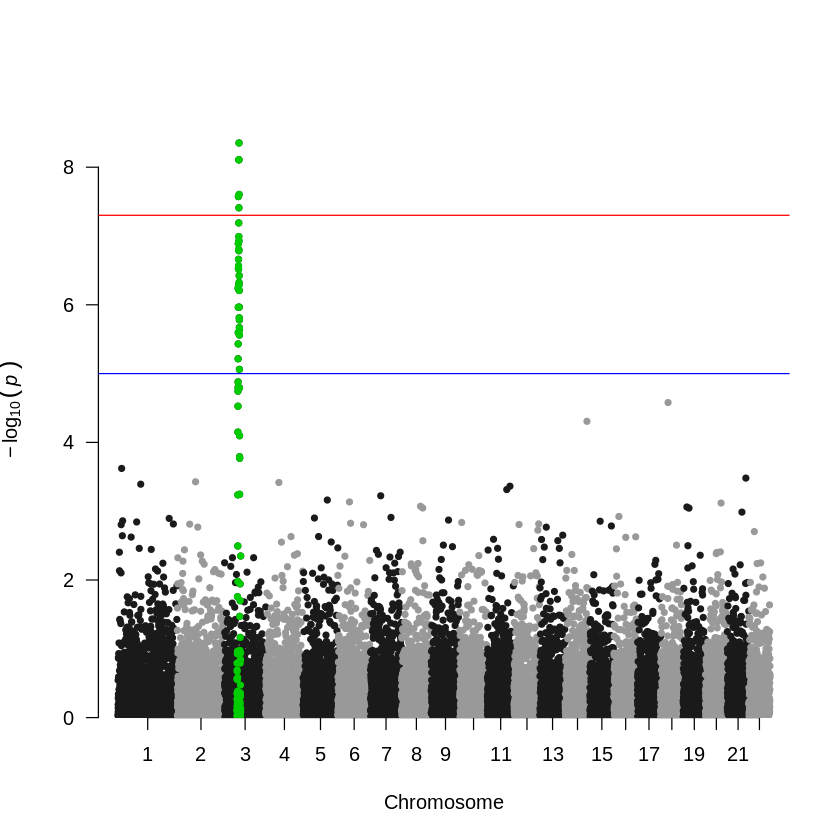

In [ ]:
manhattan(gwasResults, highlight = snpsOfInterest)

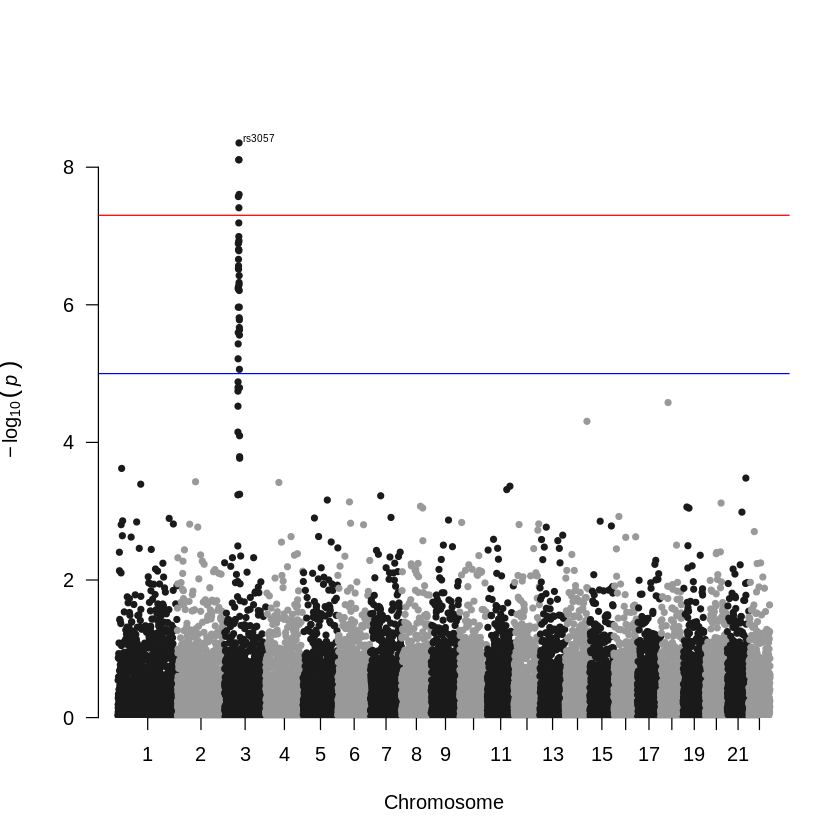

In [ ]:
manhattan(gwasResults, annotatePval = 5e-08)

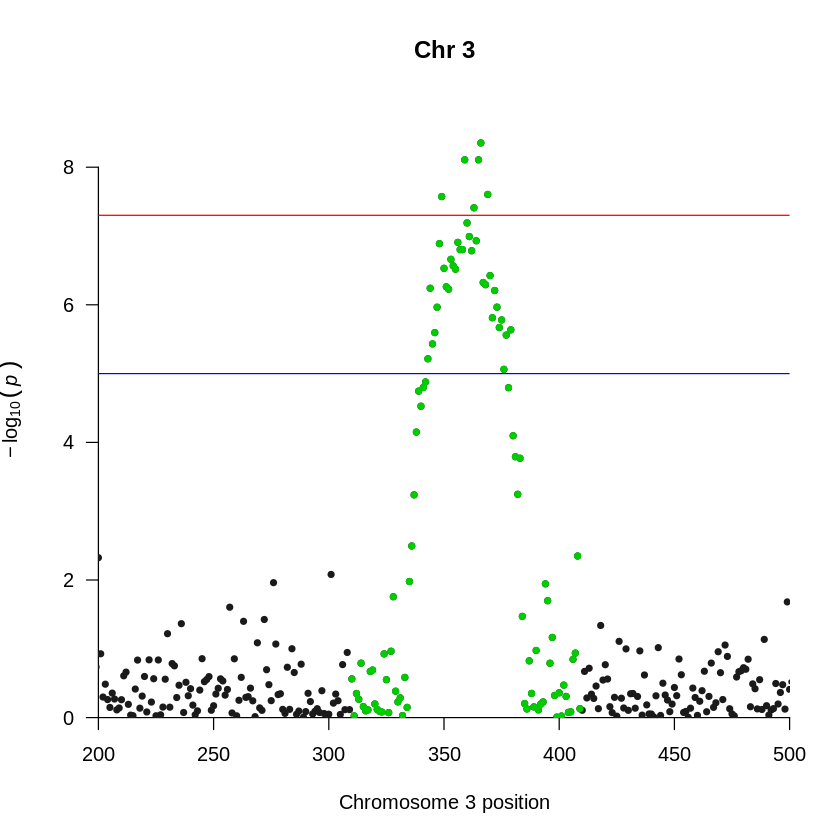

In [ ]:
# Highlighting SNPs and focusing on a specific chromosome
manhattan(subset(gwasResults, CHR == 3),
          highlight = snpsOfInterest,
          xlim = c(200, 500),
          main = "Chr 3")